In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#Download the Dataset
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749

--2024-05-07 21:15:34--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.172.139.210, 18.172.139.61, 18.172.139.46, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.172.139.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit_treadmill.csv?1639992749.1’

aerofit_treadmill.c 100%[===================>]   7.11K  --.-KB/s    in 0.001s  

2024-05-07 21:15:34 (11.2 MB/s) - ‘aerofit_treadmill.csv?1639992749.1’ saved [7279/7279]



In [5]:
aero = pd.read_csv('aerofit_treadmill.csv?1639992749.1')
aero

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [6]:
aero.shape

(180, 9)

In [7]:
aero.ndim

2

In [8]:
#The data type of all columns in the table.
aero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [9]:
#The number of rows and columns given in the dataset
aero.shape

(180, 9)

In [11]:
#missing values and find the number of missing values in each column
aero.isna()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
175,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False
177,False,False,False,False,False,False,False,False,False
178,False,False,False,False,False,False,False,False,False


In [13]:
#Outliers for every continuous variable in the dataset
# Select only the continuous variables from the DataFrame
continuous_variables = aero.select_dtypes(include=['float64', 'int64'])
def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

In [14]:
#Outliers for each continuous variable
outliers_per_variable = continuous_variables.apply(find_outliers)
outliers_per_variable

,Age,Education,Usage,Fitness,Income,Miles
14,NaN,NaN,NaN,1.0,NaN,NaN
23,NaN,NaN,NaN,NaN,NaN,188.0
78,47.0,NaN,NaN,NaN,NaN,NaN
79,50.0,NaN,NaN,NaN,NaN,NaN
84,NaN,NaN,NaN,NaN,NaN,212.0
117,NaN,NaN,NaN,1.0,NaN,NaN
139,48.0,NaN,NaN,NaN,NaN,NaN
142,NaN,NaN,NaN,NaN,NaN,200.0
148,NaN,NaN,NaN,NaN,NaN,200.0
152,NaN,NaN,NaN,NaN,NaN,200.0


In [15]:
#Remove/clip the data between the 5 percentile and 95 percentile
clipped_data = continuous_variables.apply(lambda x: np.clip(x, np.percentile(x, 5), np.percentile(x, 95)))
clipped_data

,Age,Education,Usage,Fitness,Income,Miles
0,20.00,14,3.00,4,34053.15,112
1,20.00,15,2.00,3,34053.15,75
2,20.00,14,4.00,3,34053.15,66
3,20.00,14,3.00,3,34053.15,85
4,20.00,14,4.00,2,35247.00,47
...,...,...,...,...,...,...
175,40.00,18,5.05,5,83416.00,200
176,42.00,18,5.00,4,89641.00,200
177,43.05,16,5.00,5,90886.00,160
178,43.05,18,4.00,5,90948.25,120


In [16]:
#Find if there is any relationship between the categorical variables and the output variable in the data.
# Select only the categorical variables from the DataFrame
categorical_variables = aero.select_dtypes(include=['object'])

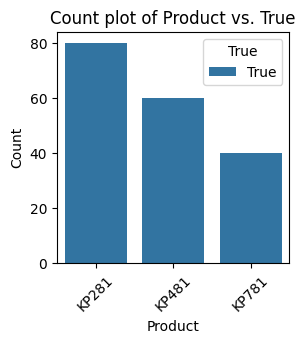

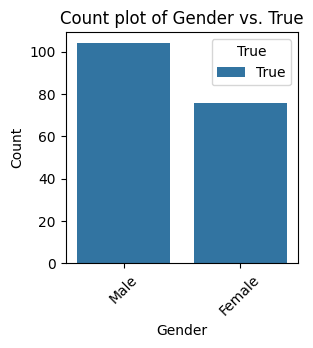

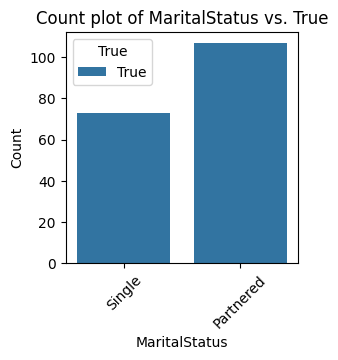

In [33]:
usage = aero['Usage'].all()
for col in categorical_variables.columns:
    plt.figure(figsize=(3, 3))
    sns.countplot(x=col, hue=usage, data=aero)
    plt.title(f"Count plot of {col} vs. {usage}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title=usage)
    plt.xticks(rotation=45)
    plt.show()

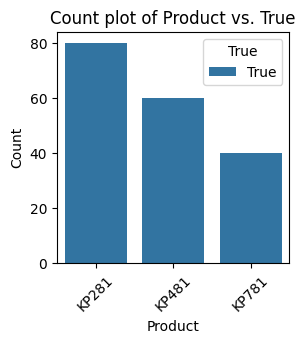

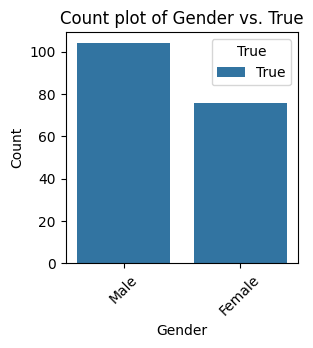

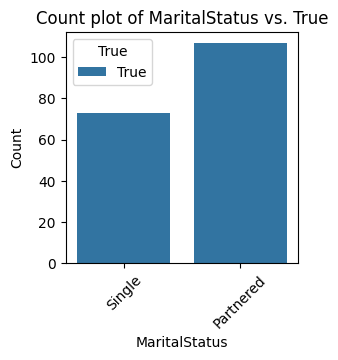

In [32]:
fitness = aero['Fitness'].all()
for col in categorical_variables.columns:
    plt.figure(figsize=(3, 3))
    sns.countplot(x=col, hue=fitness, data=aero)
    plt.title(f"Count plot of {col} vs. {fitness}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title=fitness)
    plt.xticks(rotation=45)
    plt.show()

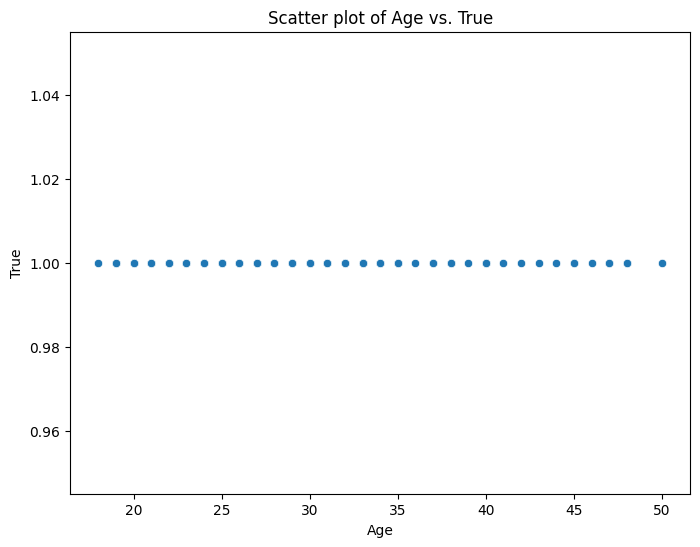

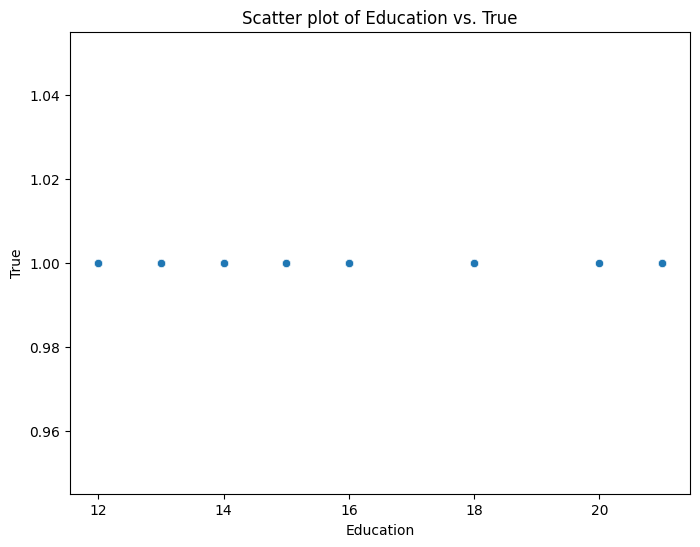

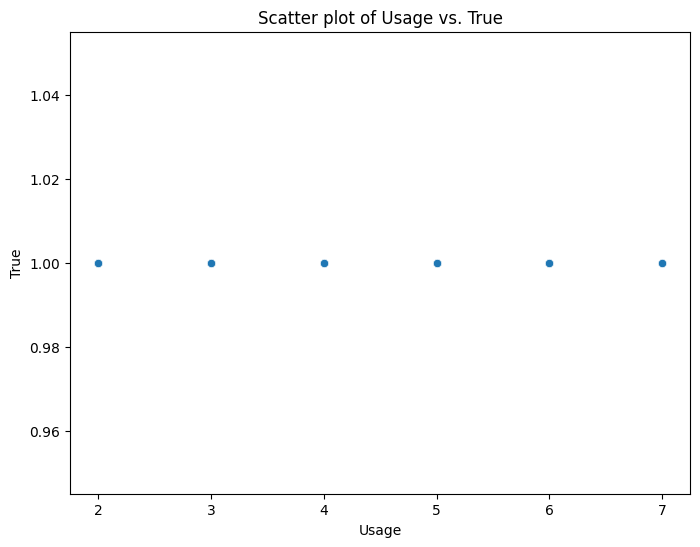

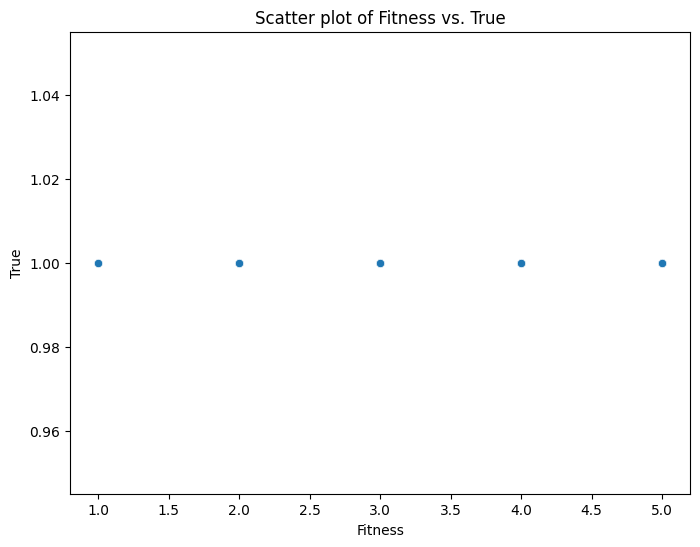

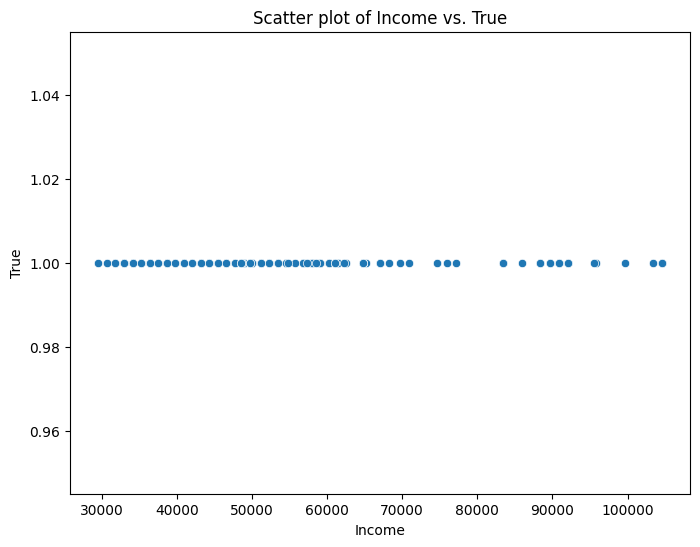

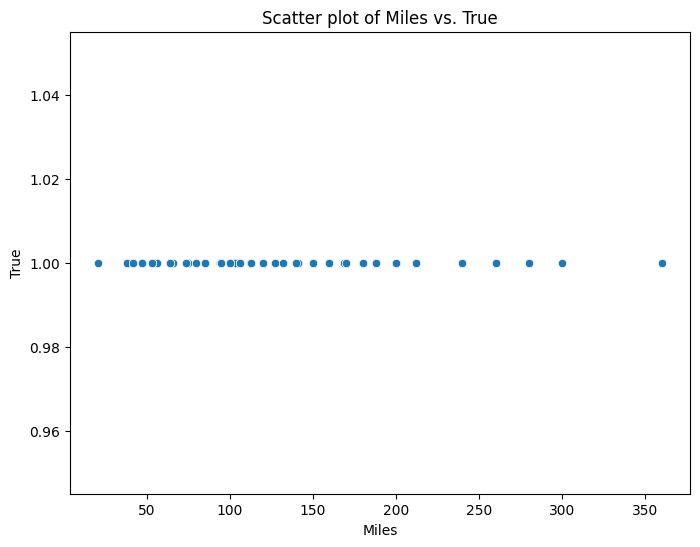

In [38]:
#Scatter plot for output_variable as "Usage"
continuous_variables = aero.select_dtypes(include=['float64', 'int64'])
usage = aero['Usage'].all()
for col in continuous_variables.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col, y=usage, data=aero)
    plt.title(f"Scatter plot of {col} vs. {usage}")
    plt.xlabel(col)
    plt.ylabel(usage)
    plt.show()

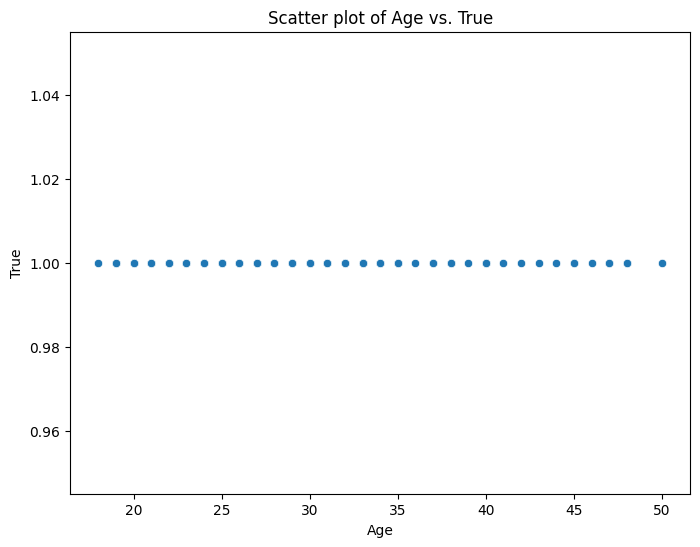

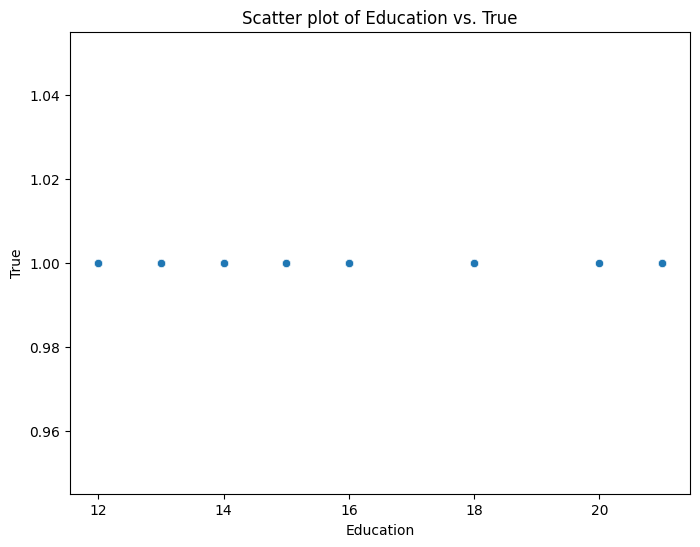

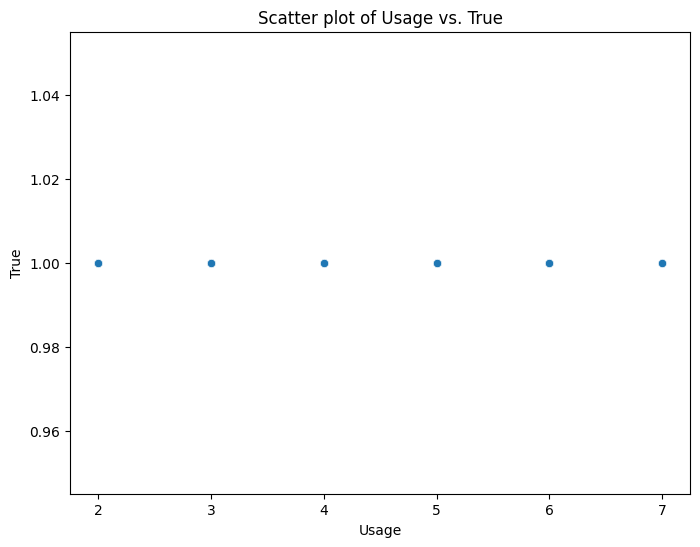

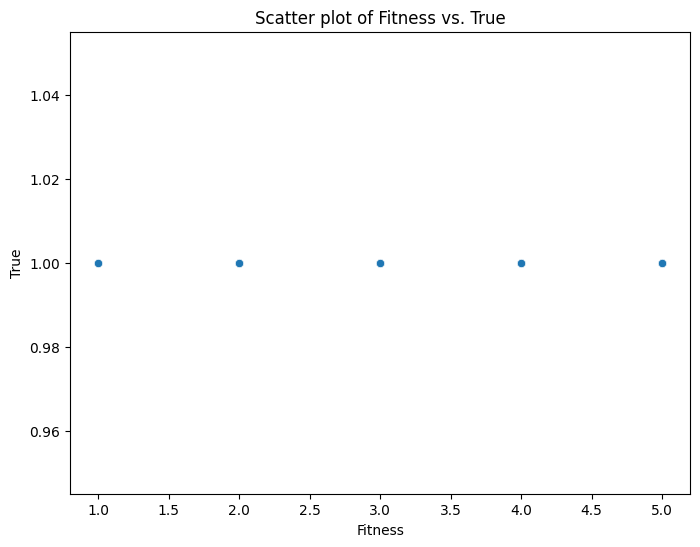

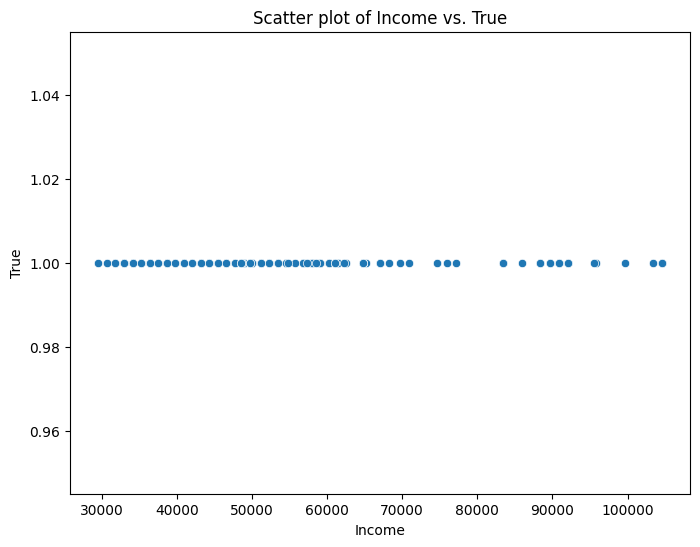

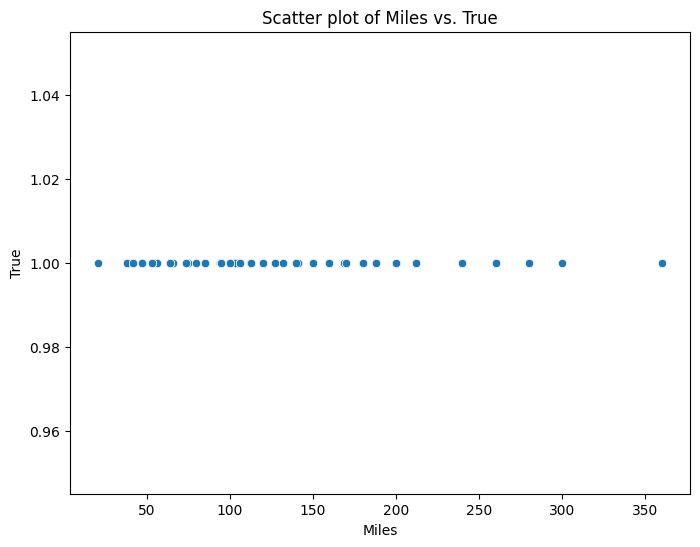

In [39]:
continuous_variables = aero.select_dtypes(include=['float64', 'int64'])
fitness = aero['Fitness'].all()
for col in continuous_variables.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col, y=fitness, data=aero)
    plt.title(f"Scatter plot of {col} vs. {fitness}")
    plt.xlabel(col)
    plt.ylabel(fitness)
    plt.show()

In [40]:
# Group the data by the product 'KP281'
kp281_data = aero[aero['Product'] == 'KP281']
kp281_data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
75,KP281,43,Male,16,Partnered,3,3,53439,66
76,KP281,44,Female,16,Single,3,4,57987,75
77,KP281,46,Female,16,Partnered,3,2,60261,47
78,KP281,47,Male,16,Partnered,4,3,56850,94


In [42]:
# Compute the crosstab to get the counts of each product
product_counts = pd.crosstab(index=aero['Product'], columns='count')

In [53]:
#marginal probability (what percent of customers have purchased KP281, KP481, or KP781)
marginal_probability = product_counts / product_counts.sum()
mg_p_i = marginal_probability.reset_index()
mg_p_i

col_0,Product,count
0,KP281,0.444444
1,KP481,0.333333
2,KP781,0.222222


<Axes: xlabel='Product', ylabel='count'>

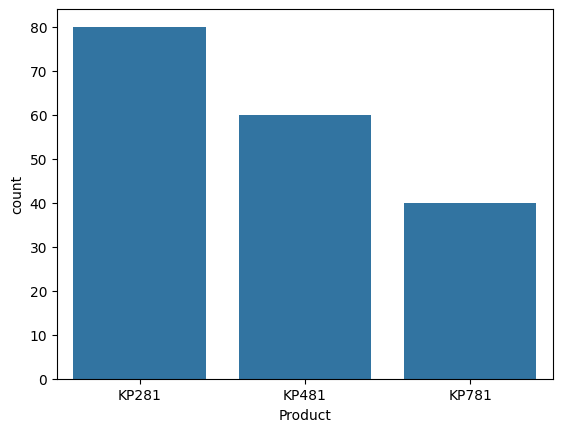

In [56]:
sns.countplot(data=mg_p_i,x=aero['Product'])

In [57]:
# Compute descriptive statistics for age, gender, and income group
age_stats = kp281_data['Age'].describe()
gender_counts = kp281_data['Gender'].value_counts()
income_group_stats = kp281_data['Income'].describe()
age_stats

count       80.00000
mean     46418.02500
std       9075.78319
min      29562.00000
25%      38658.00000
50%      46617.00000
75%      53439.00000
max      68220.00000
Name: Income, dtype: float64

In [58]:
gender_counts

Gender
Male      40
Female    40
Name: count, dtype: int64

In [59]:
income_group_stats

count       80.00000
mean     46418.02500
std       9075.78319
min      29562.00000
25%      38658.00000
50%      46617.00000
75%      53439.00000
max      68220.00000
Name: Income, dtype: float64

In [60]:
# Compute crosstab for each column with 'Product'
crosstab_gender = pd.crosstab(index=aero['Gender'], columns=aero['Product'], normalize='index')
crosstab_age = pd.crosstab(index=aero['Age'], columns=aero['Product'], normalize='index')
crosstab_marital_status = pd.crosstab(index=aero['MaritalStatus'], columns=aero['Product'], normalize='index')
crosstab_income = pd.crosstab(index=aero['Income'], columns=aero['Product'], normalize='index')

In [61]:
print("Probability of Buying Each Product based on Gender:")
print(crosstab_gender)
print("\nProbability of Buying Each Product based on Age:")
print(crosstab_age)
print("\nProbability of Buying Each Product based on Marital Status:")
print(crosstab_marital_status)
print("\nProbability of Buying Each Product based on Income:")
print(crosstab_income)

Probability of Buying Each Product based on Gender:
Product     KP281     KP481     KP781
Gender                               
Female   0.526316  0.381579  0.092105
Male     0.384615  0.298077  0.317308

Probability of Buying Each Product based on Age:
Product     KP281     KP481     KP781
Age                                  
18       1.000000  0.000000  0.000000
19       0.750000  0.250000  0.000000
20       0.400000  0.600000  0.000000
21       0.571429  0.428571  0.000000
22       0.571429  0.000000  0.428571
23       0.444444  0.388889  0.166667
24       0.416667  0.250000  0.333333
25       0.280000  0.440000  0.280000
26       0.583333  0.250000  0.166667
27       0.428571  0.142857  0.428571
28       0.666667  0.000000  0.333333
29       0.500000  0.166667  0.333333
30       0.285714  0.285714  0.428571
31       0.333333  0.500000  0.166667
32       0.500000  0.500000  0.000000
33       0.250000  0.625000  0.125000
34       0.333333  0.500000  0.166667
35       0.375000  0.500

'''Find the conditional probability that an event occurs given that another event has
occurred. (Example: given that a customer is female, what is the probability
she’ll purchase a KP481)'''

In [64]:
# Compute the probability of purchasing each product
product_counts = pd.crosstab(index=aero['Product'], columns='count')
total_customers = len(aero)
total_customers

180

In [66]:
# Compute the probability of being female
female_customers = aero[aero['Gender'] == 'Female'].shape[0]
probability_female = female_customers / total_customers
probability_female

0.4222222222222222

In [70]:
# Compute the probability of being female and purchasing each product
female_purchase_counts = pd.crosstab(index=aero[aero['Gender'] == 'Female']['Product'], columns='count')
probability_female_purchase = female_purchase_counts / female_customers
probability_female_purchase.reset_index()

col_0,Product,count
0,KP281,0.526316
1,KP481,0.381579
2,KP781,0.092105


In [72]:
# Compute the conditional probability of purchasing each product given the customer is female
conditional_probability_female_purchase = probability_female_purchase / probability_female

In [73]:
# Print the result for KP481
print("Conditional Probability of Purchasing KP481 given that the Customer is Female:")
print(conditional_probability_female_purchase.loc['KP481'])

Conditional Probability of Purchasing KP481 given that the Customer is Female:
col_0
count    0.90374
Name: KP481, dtype: float64


In [83]:
#correlation between the given features in the table.
correlation_matrix = aero.iloc[:,[1,3,5,6,7,8]].corr()

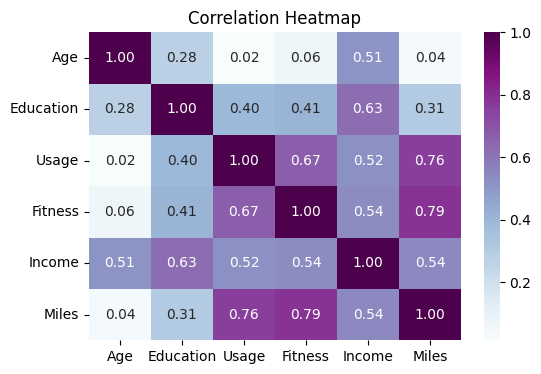

In [119]:
# Plot the correlation matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Heatmap")
plt.show()

In [85]:
mean = aero.groupby('Product')['Income'].mean()
mean

Product
KP281    46418.025
KP481    48973.650
KP781    75441.575
Name: Income, dtype: float64

In [86]:
max_income = aero.groupby('Product')['Income'].max()
max_income

Product
KP281     68220
KP481     67083
KP781    104581
Name: Income, dtype: int64

In [87]:
aero.groupby('Product')['Income'].value_counts()

Product  Income
KP281    46617     7
         54576     7
         52302     6
         35247     5
         45480     5
                  ..
KP781    52291     1
         54781     1
         53536     1
         48658     1
         52290     1
Name: count, Length: 83, dtype: int64

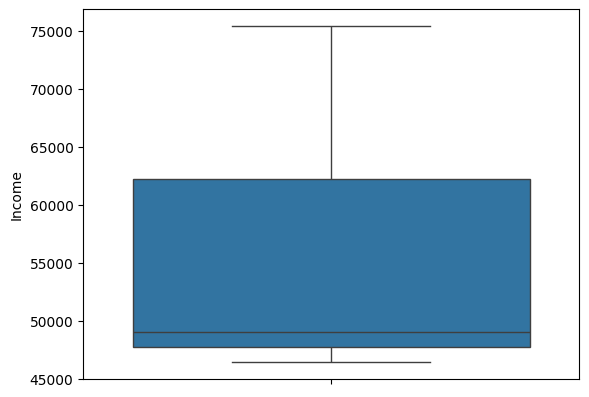

In [88]:
product = aero['Product']
sns.boxplot(data=mean)
sns.xlabel='Product'
sns.ylabel='Income'
plt.show()

In [89]:
aero.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


TypeError: 'str' object is not callable

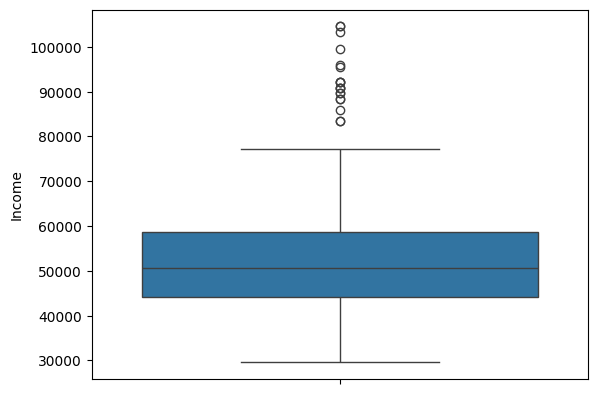

In [91]:
income = aero['Income']
product = aero['Product']
sns.boxplot(data=income)
sns.xlabel(product)
sns.ylabel(income)
plt.show()

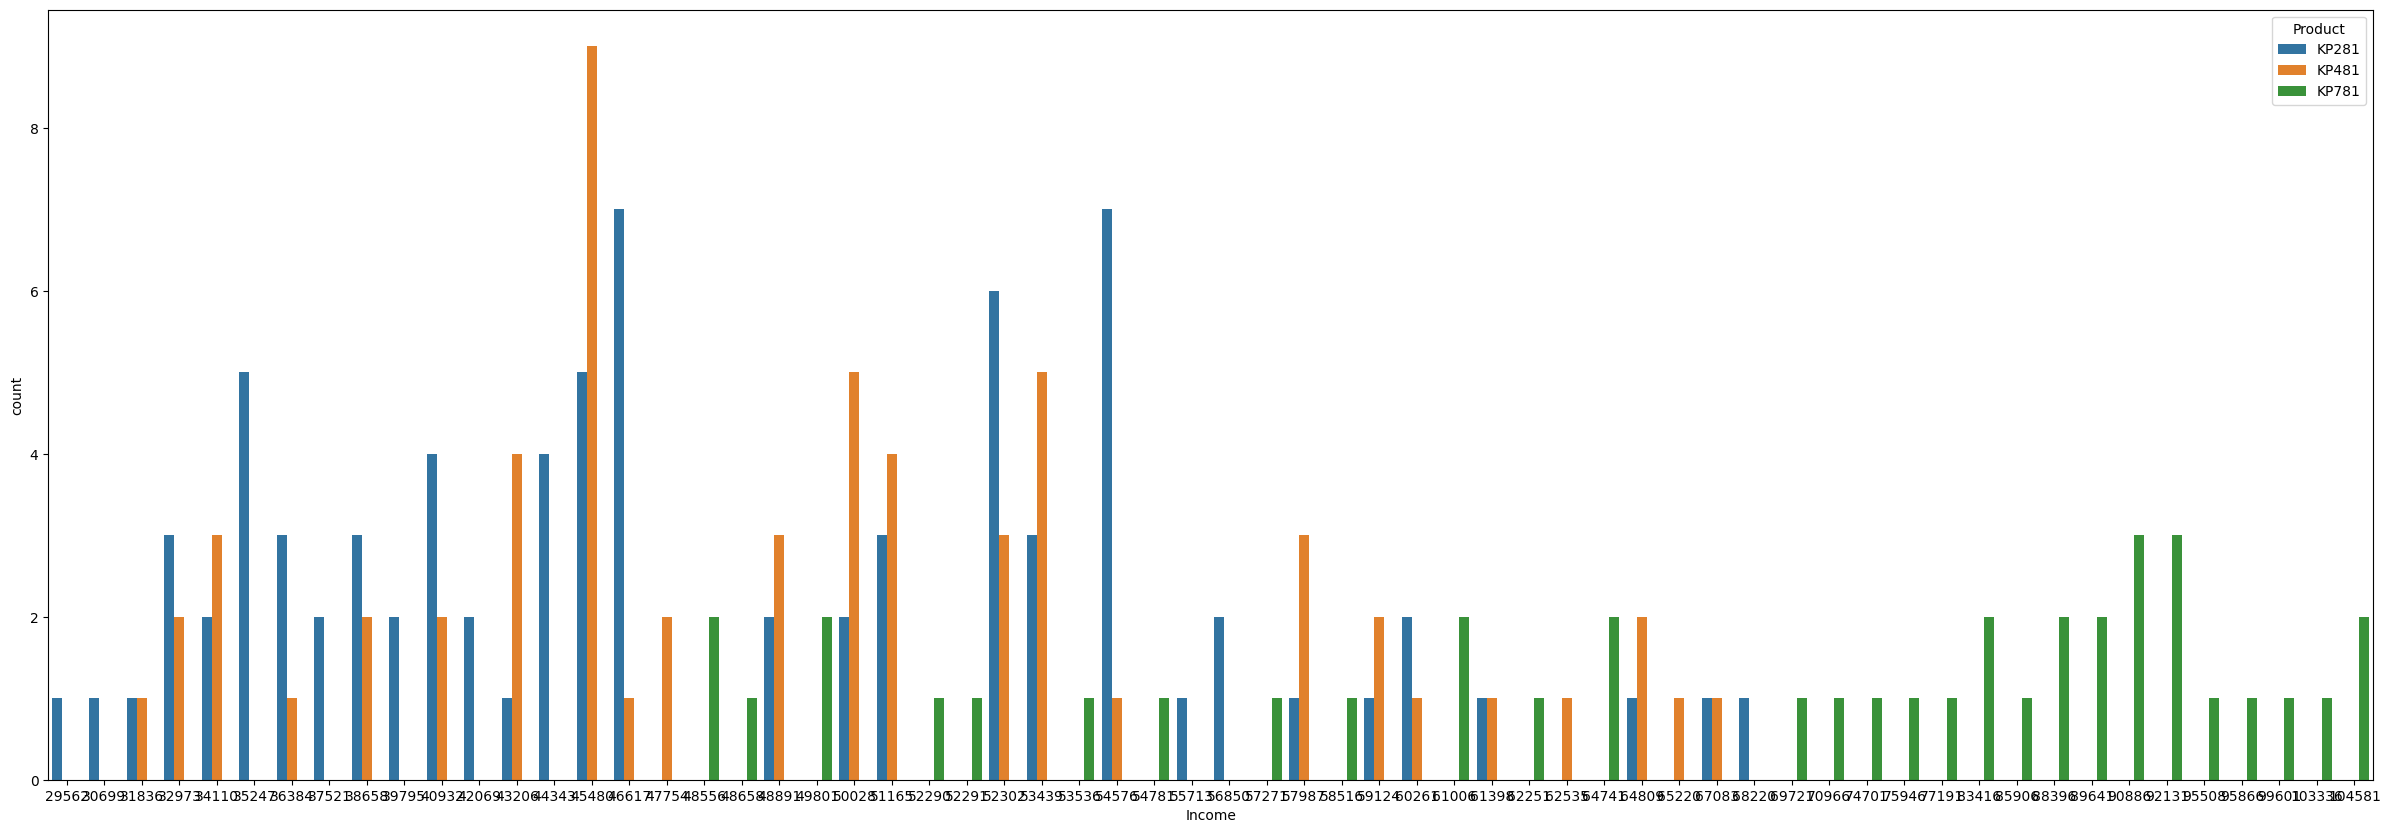

In [92]:
plt.figure(figsize=(30, 10))
sns.countplot(x='Income', hue='Product', data=aero)
plt.show()

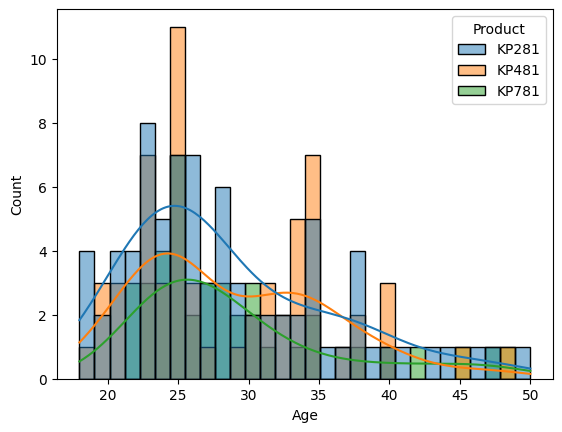

In [93]:
sns.histplot(x='Age', hue='Product', data=aero, bins=30, kde=True)
plt.show()

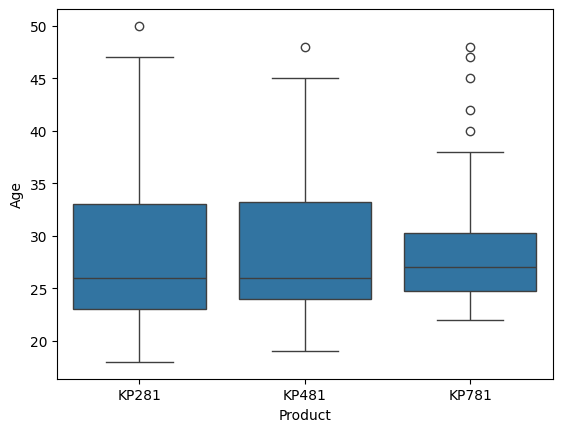

In [94]:
sns.boxplot(x='Product', y='Age', data=aero)
plt.show()